In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
incidents = pd.read_csv('incidents_dec.csv')
alerts = pd.read_csv('alerts_dec.csv')

In [3]:
incidents = incidents.loc[incidents['incident_priority']=='1 - Critical']

#epoch
incidents['u_updated_on'] = pd.to_datetime(incidents['u_updated_on']).dt.tz_convert('UTC')
incidents['epoch'] = (incidents['u_updated_on'] - pd.Timestamp("1970-01-01", tz='UTC')) // pd.Timedelta('1s')


In [4]:
alerts['alert_timestamp'] = pd.to_datetime(alerts['alert_timestamp'], unit='ns')

# convert datetime objects to epoch in seconds
alerts['epoch'] = alerts['alert_timestamp'].astype(int) // 10**9

In [6]:
inc_subsites = incidents.groupby('incident_sub_site').count().sort_values(by='incident_id')
inc_subsites = inc_subsites.reset_index()
inc_subsites = inc_subsites.loc[inc_subsites['incident_id'] > 100]
inc_subsites

,incident_sub_site,incident_id,incident_acc,incident_sub_acc,incident_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
686,ACCT0012068,101,101,101,101,101,0,101,101,101,73,73,101,101,101,101,101,101,101
687,ACCT0012869,105,105,105,105,105,14,105,105,105,75,75,105,105,105,105,105,105,105
688,ACCT0013158,105,105,105,105,105,0,105,105,105,74,74,105,105,105,105,105,105,105
689,ACCT0012747,108,108,108,108,108,0,108,108,108,78,78,108,108,108,108,108,108,108
690,ACCT0011993,112,112,112,112,112,0,112,112,112,86,86,112,112,112,112,112,112,112
691,ACCT0011256,113,113,113,113,113,0,113,113,113,79,79,113,113,113,113,113,113,113
692,ACCT0013217,115,115,115,115,115,0,115,115,115,115,115,115,115,115,115,115,115,115
693,ACCT0013134,115,115,115,115,115,0,115,115,115,84,84,115,115,115,115,115,115,115
694,ACCT0011654,116,116,116,116,116,0,116,116,116,87,87,116,116,116,116,116,116,116
695,ACCT0013230,121,121,121,121,121,0,121,121,121,90,90,121,121,121,121,121,121,121


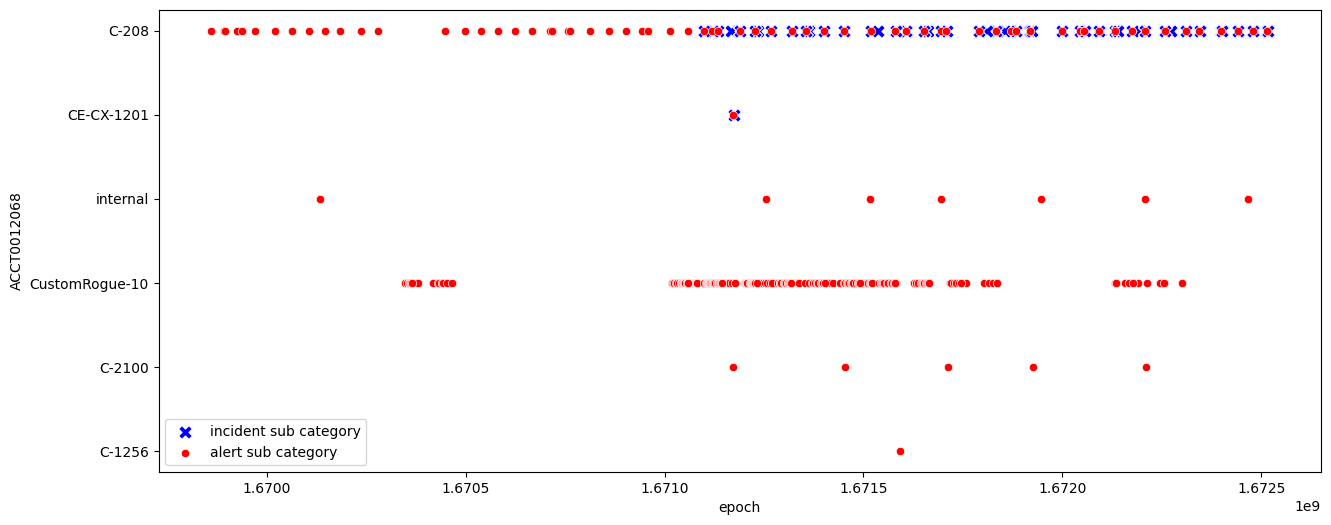

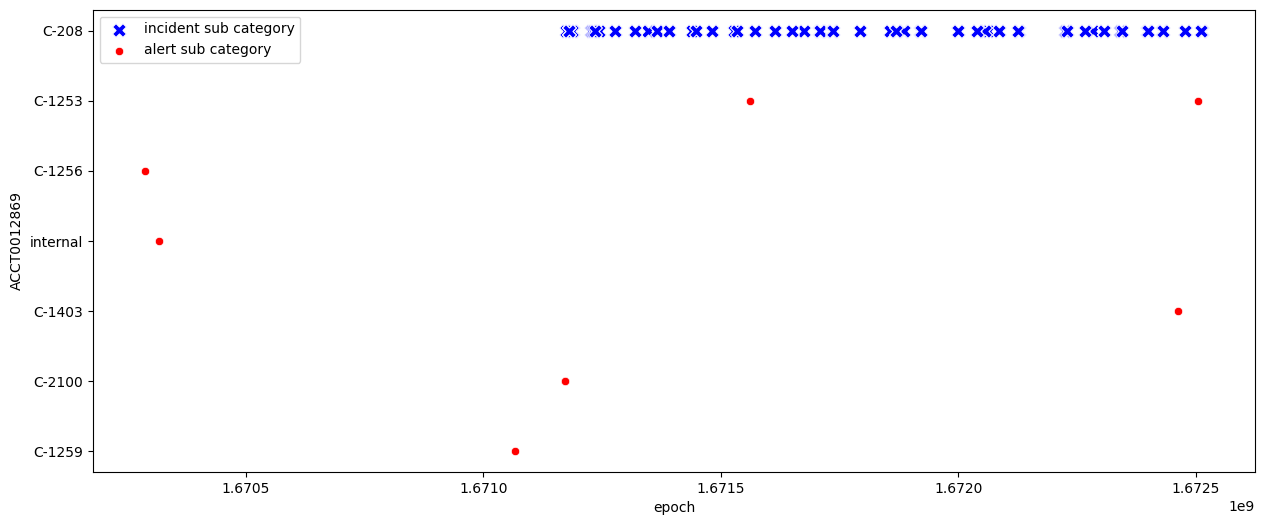

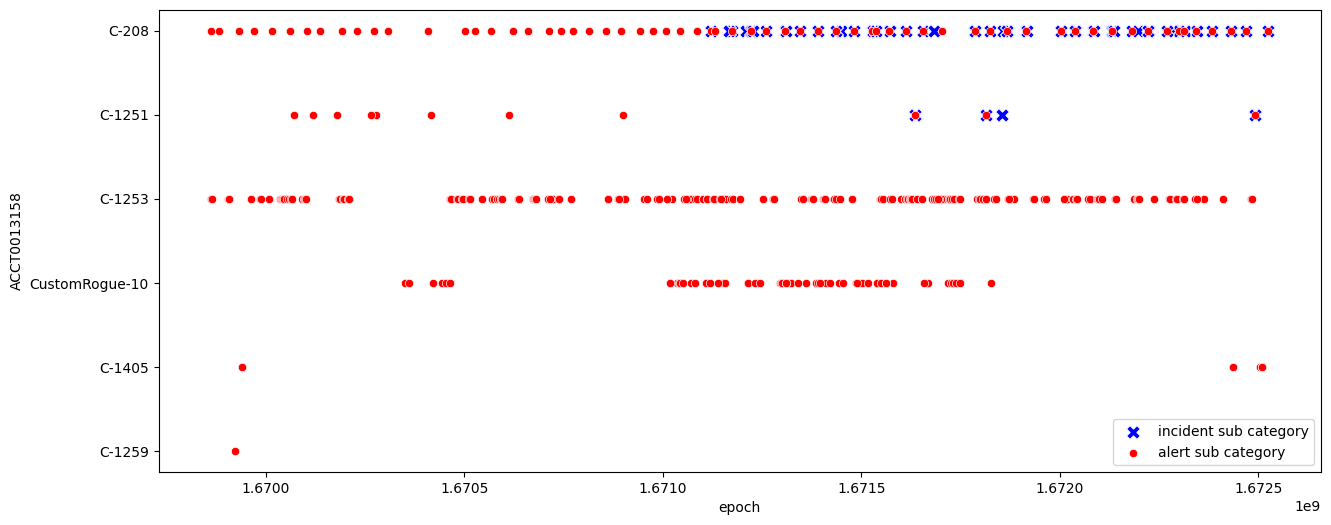

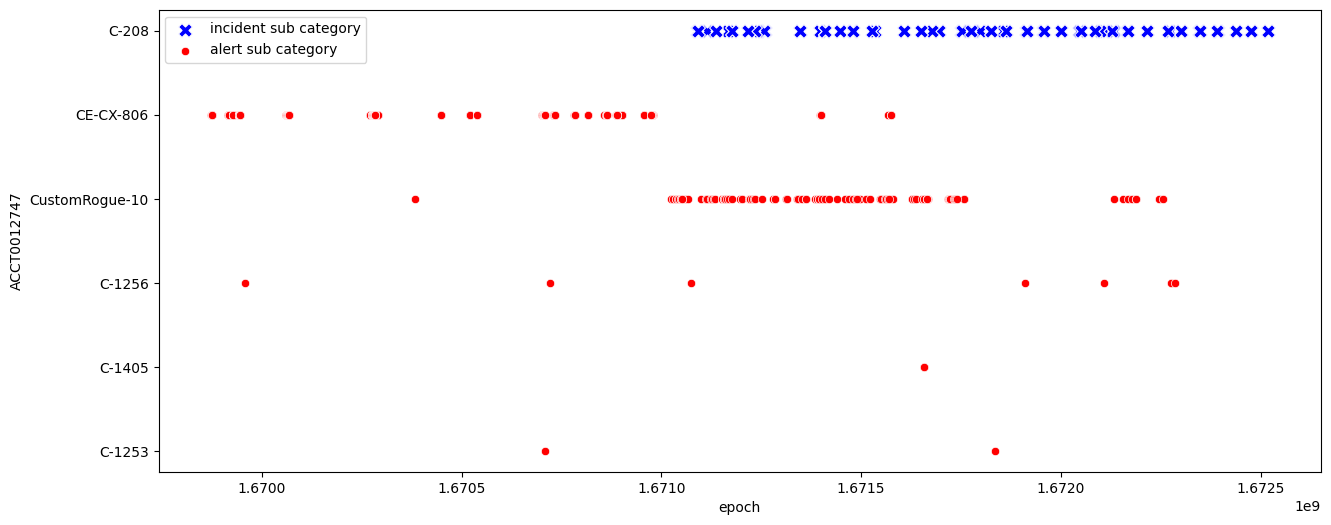

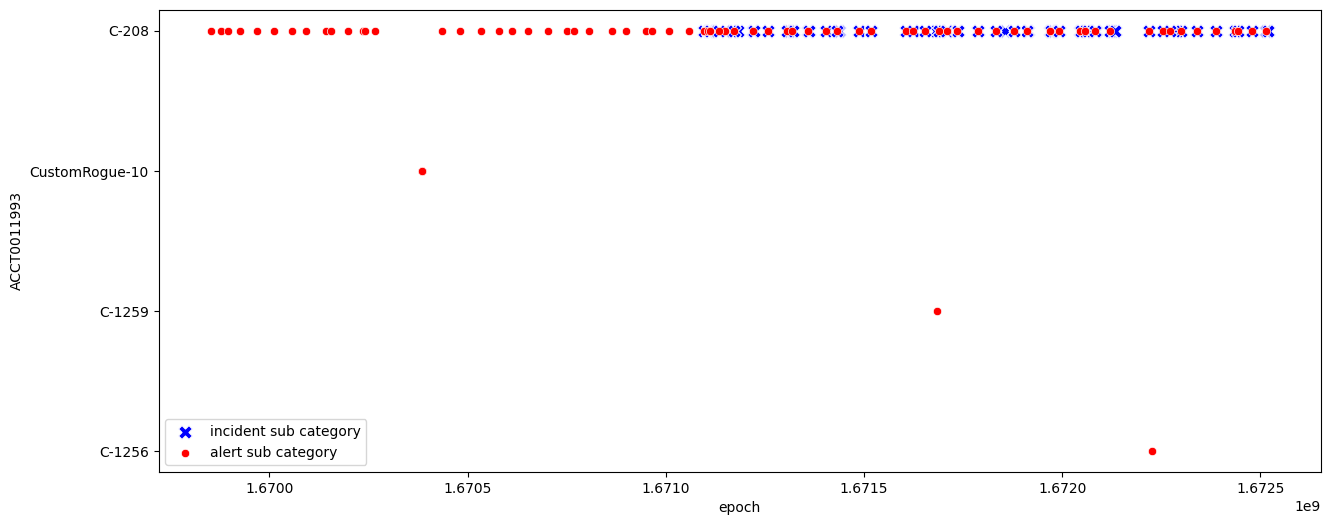

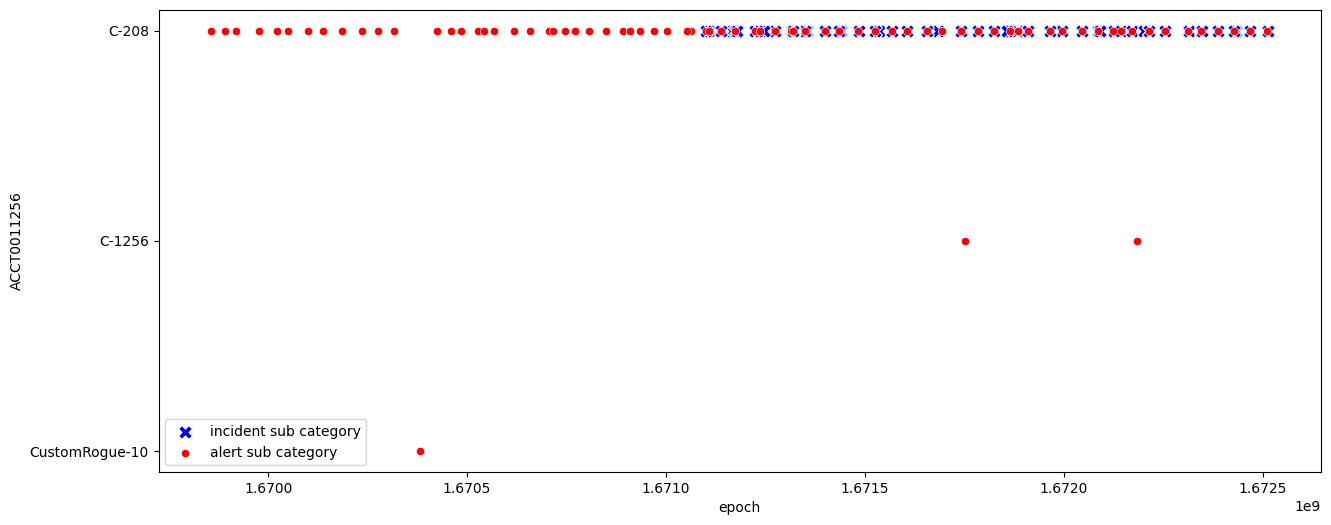

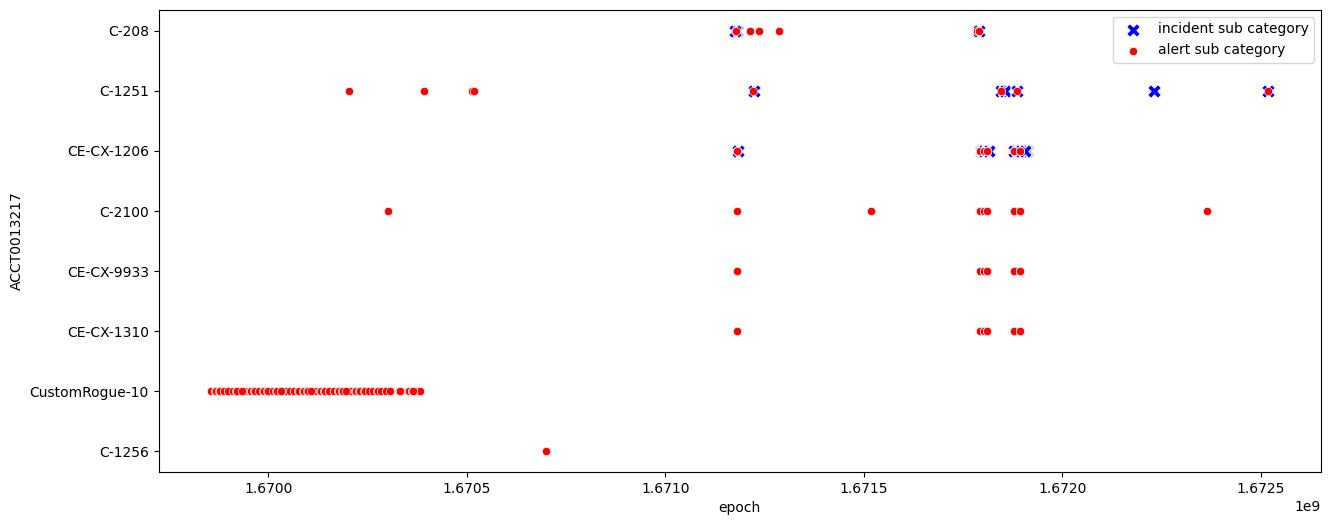

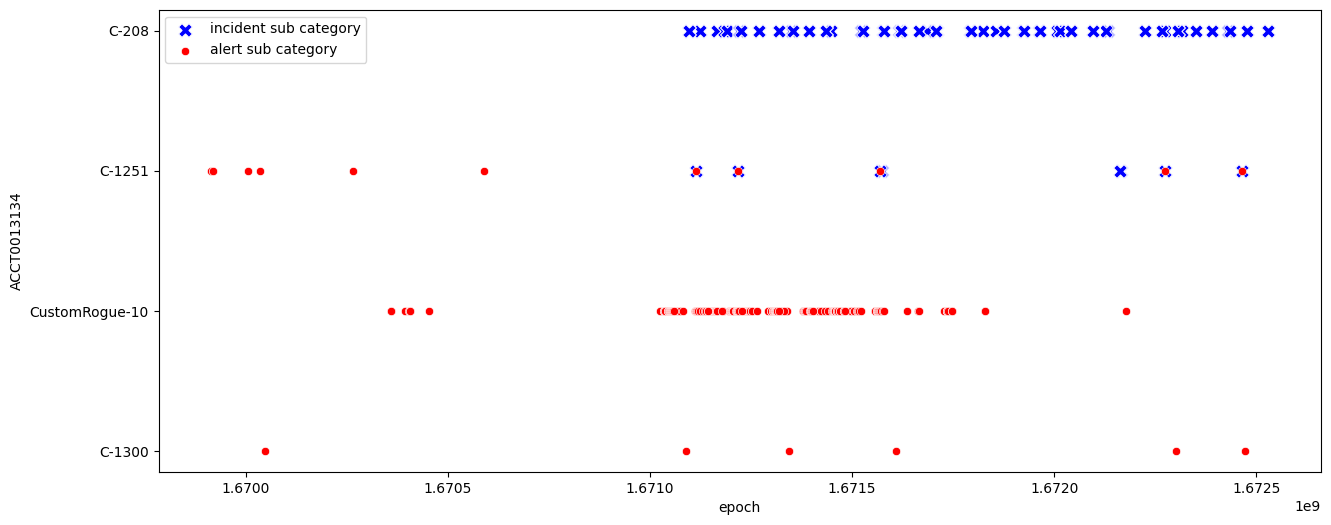

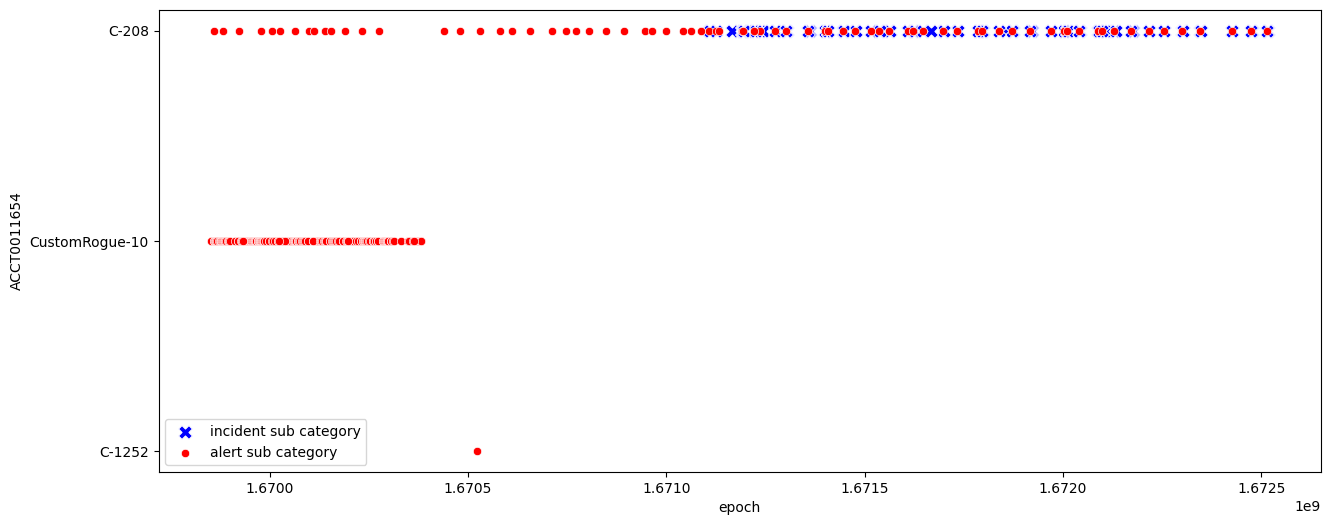

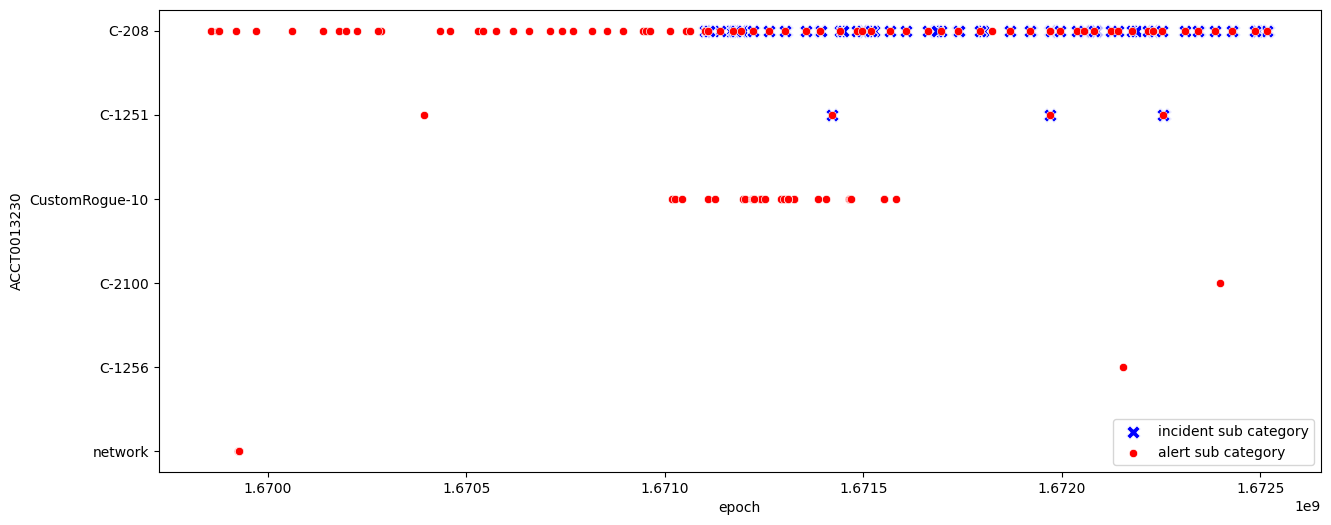

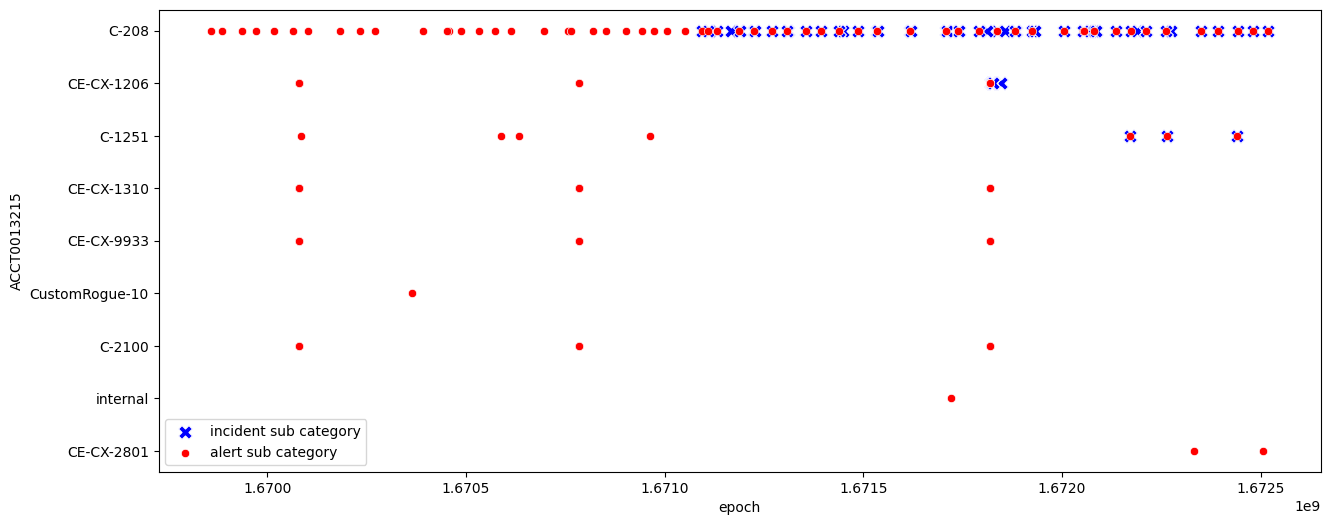

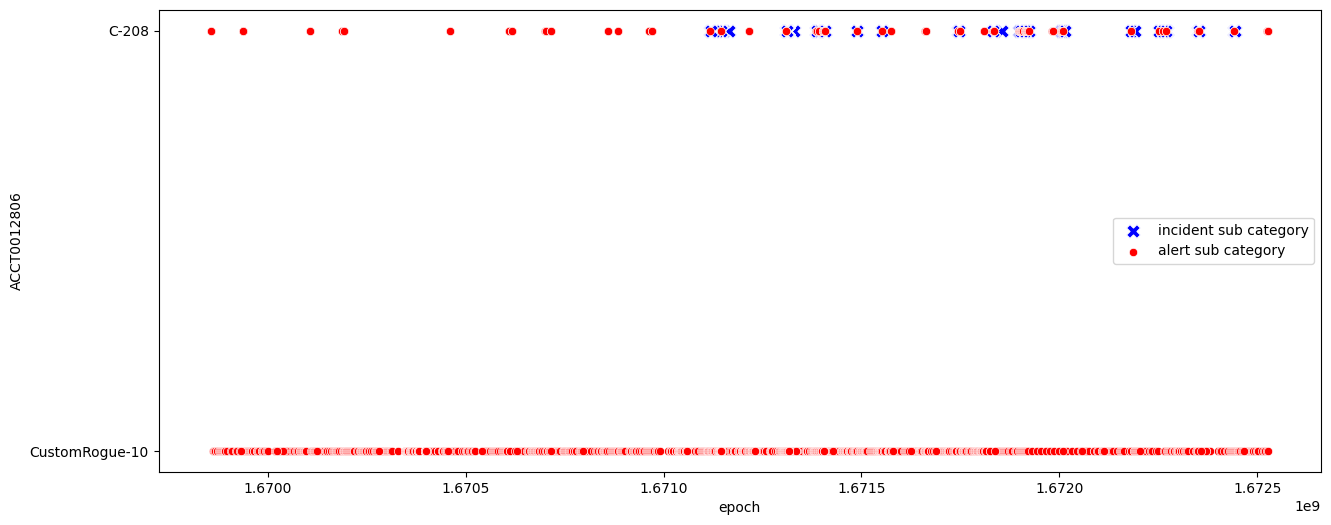

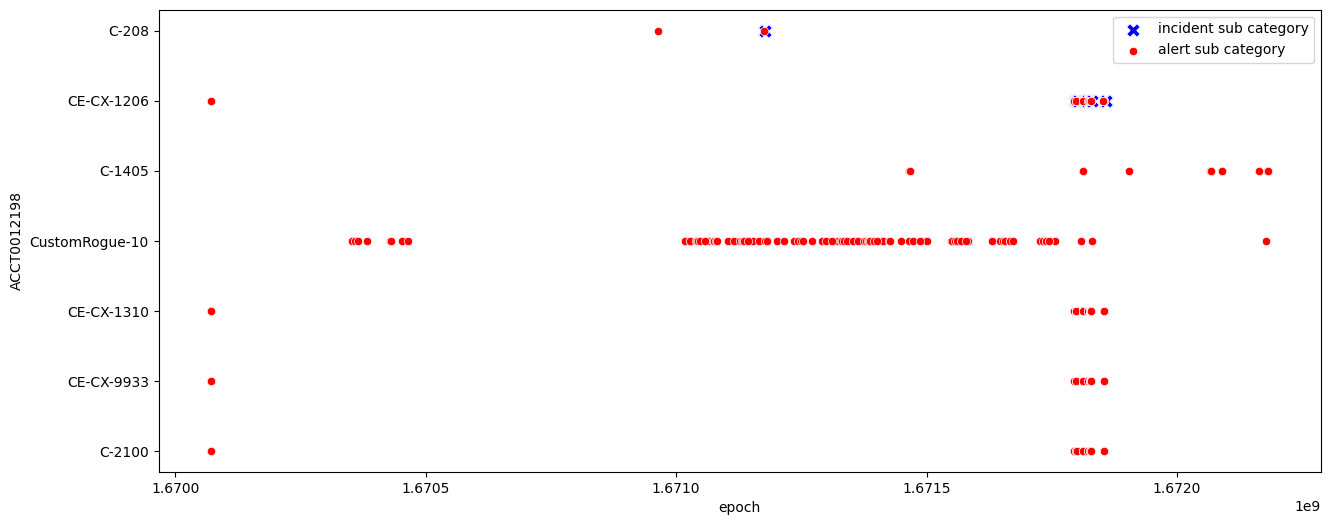

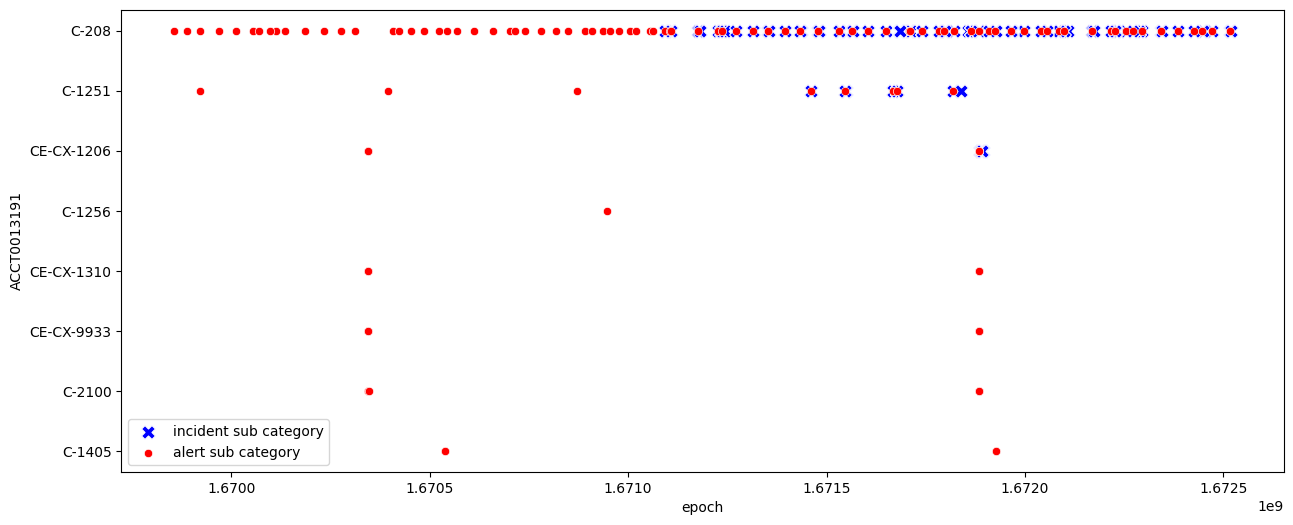

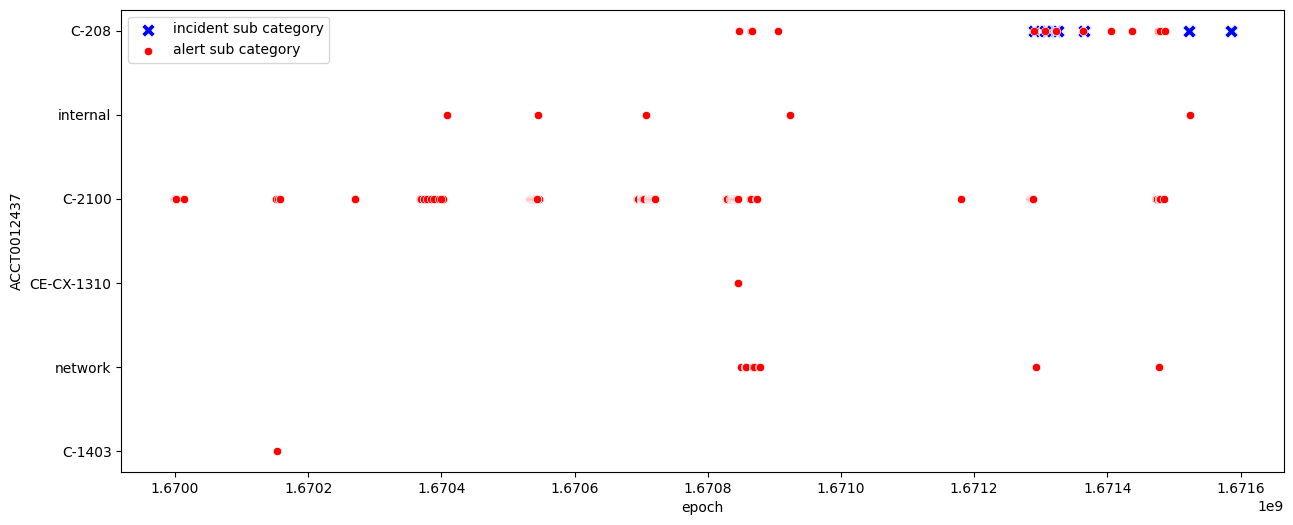

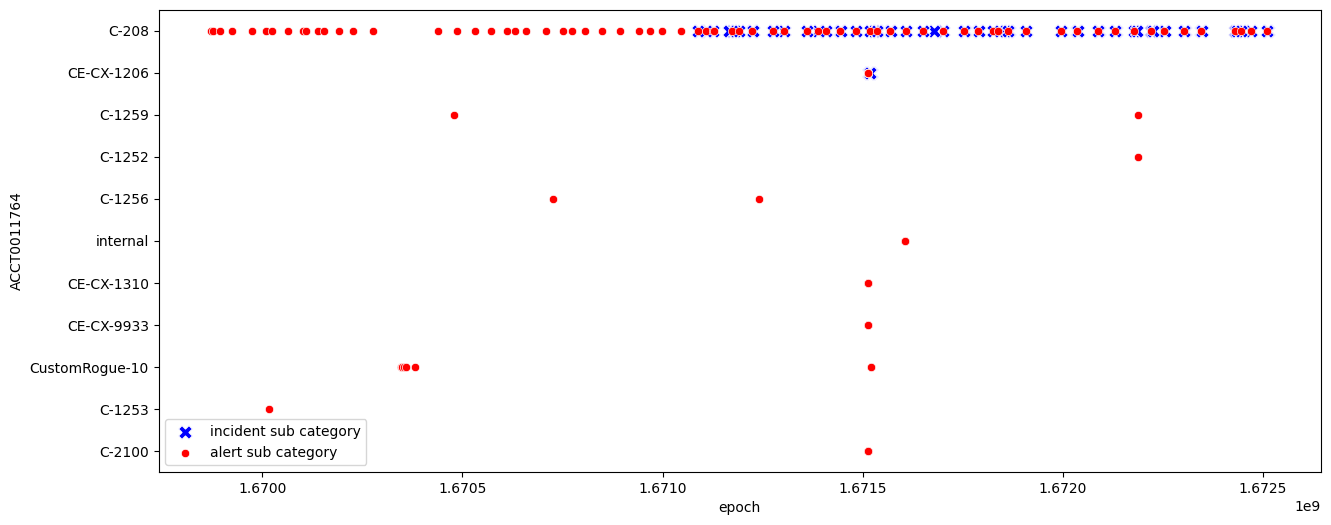

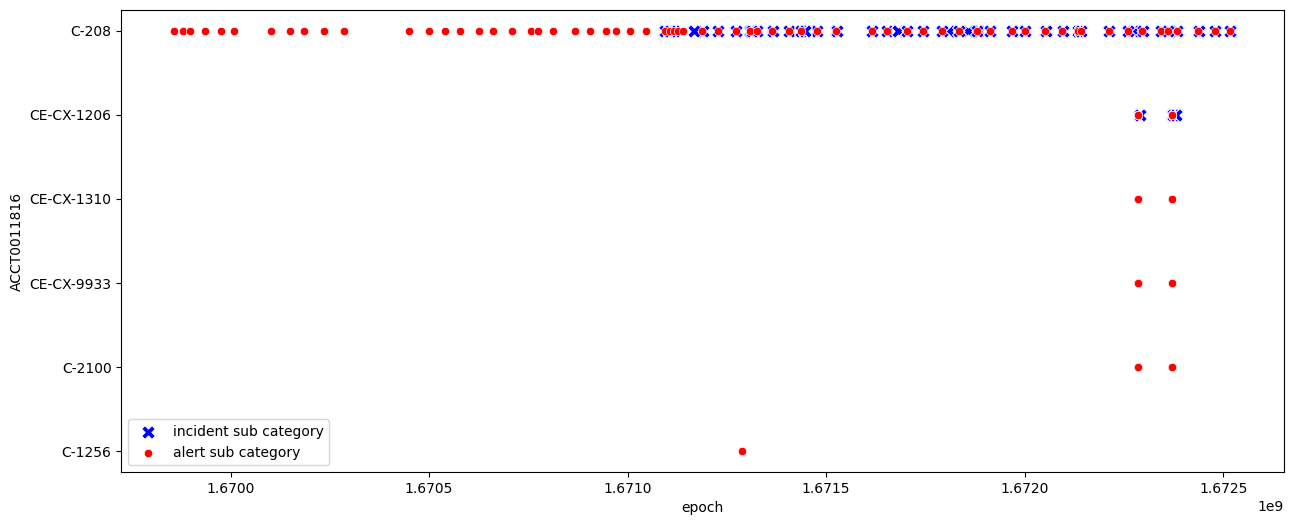

In [10]:
for i in range(len(inc_subsites)):
    x = inc_subsites.iloc[i, 0]
    inc_sub = incidents.loc[incidents['incident_sub_site']==x]
    alert_sub = alerts.loc[alerts['alert_sub_site_id']==x]
    mpl.figure(figsize=(15, 6))


    sns.scatterplot(data = inc_sub, x = 'epoch', y = 'incident_sub_category', color='blue', label = 'incident sub category', marker = "X", s = 100)

    sns.scatterplot(data = alert_sub, x = 'epoch', y = 'sub_category', color='red', label = 'alert sub category')

    #sns.scatterplot(data = alert_sub, x = 'epoch', y = 'alert_event_type', color = 'green', label = 'alert event type')
    mpl.ylabel(x)
    mpl.show()